# SPECFEM2D - noteboook

## Simple Google Colab example

To open this notebook in Google Colab, follow this link:

[google colab - specfem2d-colab-example.ipynb](https://colab.research.google.com/github/SPECFEM/specfem2d/blob/devel/EXAMPLES/notebooks/specfem2d-colab-example.ipynb)


This script will load the SPECFEM2D github repository and run a default example for testing.

To enable the GPU:
- navigate to Edit -> **Notebook Settings**...<br>
  and select **T4 GPU** from the Hardware Accelerator drop-down

# Setup

system info:

In [6]:
! uname -a

Linux be2c1952ad54 6.1.58+ #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023 x86_64 x86_64 x86_64 GNU/Linux


for GPU nodes:

In [7]:
! nvidia-smi

import os
gpu = os.environ['COLAB_GPU']
if len(gpu) == 0:
  has_gpu = False
  print("runtime has no gpu")
else:
  has_gpu = True
  print("gpu: ",gpu)

Mon Feb 12 15:43:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

current directory:

In [8]:
! pwd
! ls -al

/content
total 16
drwxr-xr-x 1 root root 4096 Feb  8 14:21 .
drwxr-xr-x 1 root root 4096 Feb 12 15:39 ..
drwxr-xr-x 4 root root 4096 Feb  8 14:20 .config
drwxr-xr-x 1 root root 4096 Feb  8 14:21 sample_data


compilers:

In [9]:
! which gcc
! which gfortran
! which nvcc

/usr/bin/gcc
/usr/bin/gfortran
/usr/local/cuda/bin/nvcc


In [10]:
! gcc --version
! gfortran --version
! nvcc --version

gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

GNU Fortran (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [11]:
! which mpif90
! which mpirun

/usr/bin/mpif90
/usr/bin/mpirun


In [12]:
! mpif90 --version
! mpirun --version

GNU Fortran (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

mpirun (Open MPI) 4.1.2

Report bugs to http://www.open-mpi.org/community/help/


download SPECFEM2D repository:

In [13]:
! git clone --branch devel https://github.com/SPECFEM/specfem2d.git

Cloning into 'specfem2d'...
remote: Enumerating objects: 42068, done.
remote: Counting objects: 100% (4204/4204), done.
remote: Compressing objects: 100% (1389/1389), done.
remote: Total 42068 (delta 2856), reused 3935 (delta 2782), pack-reused 37864
Receiving objects: 100% (42068/42068), 307.24 MiB | 14.62 MiB/s, done.
Resolving deltas: 100% (29931/29931), done.
Updating files: 100% (2318/2318), done.


# Configuration

Let's configure and compile the package:

In [14]:
%cd /content/specfem2d
! ls -al

/content/specfem2d
total 600
drwxr-xr-x 18 root root   4096 Feb 12 15:43 .
drwxr-xr-x  1 root root   4096 Feb 12 15:43 ..
-rw-r--r--  1 root root     47 Feb 12 15:43 AUTHORS
drwxr-xr-x  2 root root   4096 Feb 12 15:43 .azure-pipelines
-rw-r--r--  1 root root   6045 Feb 12 15:43 .azure-pipelines.yml
drwxr-xr-x  2 root root   4096 Feb 12 15:43 bin
-rw-r--r--  1 root root   2661 Feb 12 15:43 CITATION.cff
-rw-r--r--  1 root root     77 Feb 12 15:43 .codecov.yml
-rwxr-xr-x  1 root root  50726 Feb 12 15:43 config.guess
-rwxr-xr-x  1 root root  36846 Feb 12 15:43 config.sub
-rwxr-xr-x  1 root root 287384 Feb 12 15:43 configure
-rw-r--r--  1 root root  12377 Feb 12 15:43 configure.ac
-rw-r--r--  1 root root   4576 Feb 12 15:43 CONTRIBUTING.md
drwxr-xr-x  2 root root   4096 Feb 12 15:43 DATA
drwxr-xr-x  8 root root   4096 Feb 12 15:43 doc
drwxr-xr-x 44 root root   4096 Feb 12 15:43 EXAMPLES
drwxr-xr-x  4 root root   4096 Feb 12 15:43 external_libs
-rw-r--r--  1 root root  11727 Feb 12 15:43 fla

now configure with CUDA support:

In [15]:
# debugging
#! ./configure --enable-debug --with-cuda=cuda10 CUDA_LIB=/usr/local/cuda/lib64

# parallel version w/ CUDA support
! ./configure --with-mpi --with-cuda=cuda10 CUDA_LIB=/usr/local/cuda/lib64 FLAGS_CHECK="-O2 -Wall -Wno-do-subscript -Wno-conversion -Wno-maybe-uninitialized"

## ---------------------------- ##
## setting up compilation flags ##
## ---------------------------- ##
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for gfortran... gfortran
checking whether the Fortran compiler works... yes
checking for Fortran compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether the compiler supports GNU Fortran... yes
checking whether gfortran accepts -g... yes
configure: running /bin/bash ./flags.guess
checking how to get verbose linking output from gfortran... -v
checking for Fortran libraries of gfortran...  -L/usr/lib/gcc/x86_64-linux-gnu/11 -L/usr/lib/gcc/x86_64-linux-gnu/11/../../../x86_64-linux-gnu -L/usr/lib/gcc/x86_64-linux-gnu/11/../../../../lib -L/lib/x86_64-linux-gnu -L/lib/../lib -L/usr/lib/x86_64-linux-gnu -L/usr/lib/../lib -L/usr/local/cuda/lib64/stubs -L/us

compile the code:

In [16]:
! make clean
! make -j2 all

cleaning all
rm -f   ./obj/adj_seismogram.aux.o  ./obj/check_quality_external_mesh.aux.o  ./obj/convolve_source_timefunction.aux.o   ./bin/xadj_seismogram ./bin/xcheck_quality_external_mesh ./bin/xconvolve_source_timefunction   ./obj/assemble_MPI_scalar_cuda.cuda.o ./obj/assemble_MPI_vector_cuda.cuda.o ./obj/check_fields_cuda.cuda.o ./obj/compute_add_sources_viscoacoustic_cuda.cuda.o ./obj/compute_add_sources_viscoelastic_cuda.cuda.o ./obj/compute_coupling_cuda.cuda.o ./obj/compute_forces_acoustic_cuda.cuda.o ./obj/compute_forces_viscoelastic_cuda.cuda.o ./obj/compute_kernels_cuda.cuda.o ./obj/compute_stacey_acoustic_cuda.cuda.o ./obj/compute_stacey_viscoelastic_cuda.cuda.o ./obj/enforce_acoustic_free_surface_cuda.cuda.o ./obj/helper_functions.cuda.o ./obj/initialize_cuda.cuda.o ./obj/pml_compute_cuda.cuda.o ./obj/prepare_mesh_constants_cuda.cuda.o ./obj/smooth_cuda.cuda.o ./obj/transfer_fields_cuda.cuda.o ./obj/update_displacement_cuda.cuda.o ./obj/write_seismograms_cuda.cuda.o  ./obj

In [17]:
! ls -al ./bin

total 6148
drwxr-xr-x  2 root root    4096 Feb 12 15:46 .
drwxr-xr-x 18 root root    4096 Feb 12 15:43 ..
-rw-r--r--  1 root root       0 Feb 12 15:43 .keep
-rwxr-xr-x  1 root root   29616 Feb 12 15:46 xadj_seismogram
-rwxr-xr-x  1 root root  179192 Feb 12 15:46 xcheck_quality_external_mesh
-rwxr-xr-x  1 root root  209544 Feb 12 15:46 xcombine_sem
-rwxr-xr-x  1 root root   16880 Feb 12 15:46 xconvolve_source_timefunction
-rwxr-xr-x  1 root root  490344 Feb 12 15:46 xmeshfem2D
-rwxr-xr-x  1 root root 1192136 Feb 12 15:46 xsmooth_sem
-rwxr-xr-x  1 root root 3933504 Feb 12 15:46 xspecfem2D
-rwxr-xr-x  1 root root  213808 Feb 12 15:46 xsum_kernels


# GPU utility

check card with the little gpu helper tool:

In [18]:
%cd /content/specfem2d/utils/GPU_tools/
! nvcc --gpu-architecture=sm_75 -o check_cuda_device check_cuda_device.cu
! ./check_cuda_device

/content/specfem2d/utils/GPU_tools

found number of CUDA devices = 1


GPU device id: 0

Device Name = Tesla T4

memory:
  totalGlobalMem (in MB, dividing by powers of 1024): 15102.062500
  totalGlobalMem (in GB, dividing by powers of 1024): 14.748108

  totalGlobalMem (in MB, dividing by powers of 1000): 15835.660156
  totalGlobalMem (in GB, dividing by powers of 1000): 15.835660

  sharedMemPerBlock (in bytes): 49152

blocks:
  Maximum number of registers per block: 65536
  Maximum number of threads per block: 1024
  Maximum size of each dimension of a block: 1024 x 1024 x 64
  Maximum sizes of each dimension of a grid: 2147483647 x 65535 x 65535

features:
  Compute capability of the device = 7.5
  multiProcessorCount: 40
  canMapHostMemory: TRUE
  deviceOverlap: TRUE

0: GPU memory usage (dividing by powers of 1024): used = 103.000000 MB, free = 14999.062500 MB, total = 15102.062500 MB


0: GPU memory usage (dividing by powers of 1000): used = 108.003328 MB, free = 15727.656960 MB,

# Run example on CPU

Default example:

In [19]:
%cd /content/specfem2d
%cd EXAMPLES/simple_topography_and_also_a_simple_fluid_layer
! ls -al

/content/specfem2d
/content/specfem2d/EXAMPLES/simple_topography_and_also_a_simple_fluid_layer
total 36
drwxr-xr-x  5 root root 4096 Feb 12 15:43 .
drwxr-xr-x 44 root root 4096 Feb 12 15:43 ..
drwxr-xr-x  2 root root 4096 Feb 12 15:43 DATA
-rw-r--r--  1 root root  698 Feb 12 15:43 README
drwxr-xr-x  2 root root 4096 Feb 12 15:43 REF_KERNEL
drwxr-xr-x  2 root root 4096 Feb 12 15:43 REF_SEIS
-rwxr-xr-x  1 root root 4173 Feb 12 15:43 run_this_example_kernel.sh
-rwxr-xr-x  1 root root 1455 Feb 12 15:43 run_this_example.sh


In [20]:
! sed -i "s:^NSTEP .*:NSTEP = 500:" DATA/Par_file
! sed -i "s:^GPU_MODE .*:GPU_MODE = .false.:" DATA/Par_file
! ./run_this_example.sh

running example: Mon Feb 12 03:46:51 PM UTC 2024

setting up example...


running mesher...


 **********************************************
 *** Specfem 2-D Mesher - MPI version       ***
 **********************************************

 Running Git version of the code corresponding to 9343a0a46289bbc603b7d4cec565bdfb9a44b5d3
 dating 2024-02-08 22:26:52 +0100

 Reading the parameter file...

 Title of the simulation: Test of SPECFEM2D with curved interfaces

 Receiver lines:
   Nb of line sets =            2

 Parameter file successfully read 


 Mesh from internal meshing:
   Materials:
   Nb of solid, fluid or porous materials =            4

 --------
 Material #           1  isotropic
 rho,cp,cs   =    2700.0000000000000        3000.0000000000000        1732.0509999999999     
 Qkappa, Qmu =    9999.0000000000000        9999.0000000000000     
 Material is solid
 --------
 Material #           2  isotropic
 rho,cp,cs   =    2500.0000000000000        2700.0000000000000        0.00

In [21]:
! ls -al OUTPUT_FILES/

total 63896
drwxr-xr-x 2 root root     4096 Feb 12 15:47 .
drwxr-xr-x 7 root root     4096 Feb 12 15:46 ..
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0001.BXX.semd
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0001.BXZ.semd
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0002.BXX.semd
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0002.BXZ.semd
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0003.BXX.semd
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0003.BXZ.semd
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0004.BXX.semd
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0004.BXZ.semd
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0005.BXX.semd
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0005.BXZ.semd
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0006.BXX.semd
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0006.BXZ.semd
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0007.BXX.semd
-rw-r--r-- 1 root root    27500 Feb 12 15:47 AA.S0007.BXZ.semd
-rw-r--r-- 

let's plot the traces:

trace:  21 OUTPUT_FILES/AA.S0022.BXZ.semd
trace:  20 OUTPUT_FILES/AA.S0021.BXZ.semd
trace:  19 OUTPUT_FILES/AA.S0020.BXZ.semd
trace:  18 OUTPUT_FILES/AA.S0019.BXZ.semd
trace:  17 OUTPUT_FILES/AA.S0018.BXZ.semd
trace:  16 OUTPUT_FILES/AA.S0017.BXZ.semd
trace:  15 OUTPUT_FILES/AA.S0016.BXZ.semd
trace:  14 OUTPUT_FILES/AA.S0015.BXZ.semd
trace:  13 OUTPUT_FILES/AA.S0014.BXZ.semd
trace:  12 OUTPUT_FILES/AA.S0013.BXZ.semd
trace:  11 OUTPUT_FILES/AA.S0012.BXZ.semd
trace:  10 OUTPUT_FILES/AA.S0011.BXZ.semd
trace:  9 OUTPUT_FILES/AA.S0010.BXZ.semd
trace:  8 OUTPUT_FILES/AA.S0009.BXZ.semd
trace:  7 OUTPUT_FILES/AA.S0008.BXZ.semd
trace:  6 OUTPUT_FILES/AA.S0007.BXZ.semd
trace:  5 OUTPUT_FILES/AA.S0006.BXZ.semd
trace:  4 OUTPUT_FILES/AA.S0005.BXZ.semd
trace:  3 OUTPUT_FILES/AA.S0004.BXZ.semd
trace:  2 OUTPUT_FILES/AA.S0003.BXZ.semd
trace:  1 OUTPUT_FILES/AA.S0002.BXZ.semd
trace:  0 OUTPUT_FILES/AA.S0001.BXZ.semd


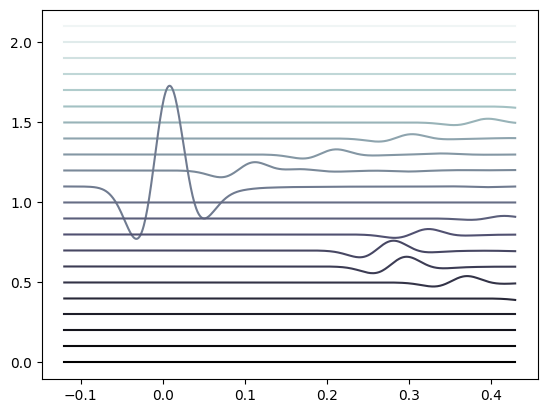

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import glob

cmap = plt.get_cmap('bone')
offset = 0.1

# gets seismograms
files = glob.glob('OUTPUT_FILES/*.BXZ.semd')

for i,file in enumerate(sorted(files,key=lambda x: int(os.path.basename(x).split('.')[1][1:]),reverse=True)):
    irev = len(files)-i-1
    print("trace: ",irev,file)
    trace = np.loadtxt(file)
    plt.plot(trace[:,0],trace[:,1]+irev*offset,color=cmap(irev/len(files)))

# saves as JPEG file
plt.savefig("OUTPUT_FILES/tmp_traces.jpg")

plt.show()

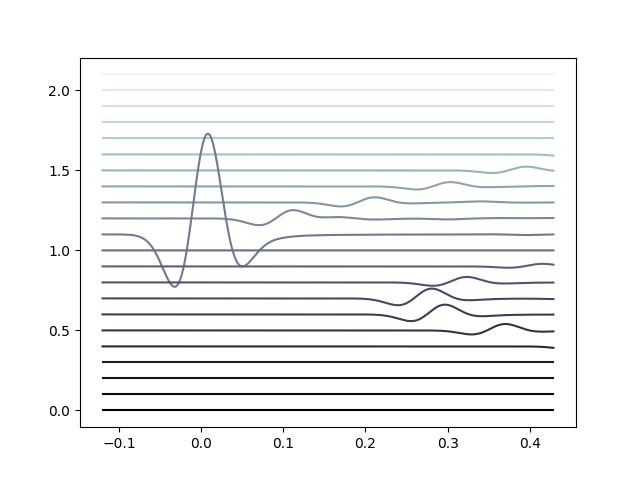

In [23]:
from IPython.display import Image, display
display(Image('OUTPUT_FILES/tmp_traces.jpg',width=400))


# Run example on GPU

Let's run a default example on the GPU:

In [24]:
%cd /content/specfem2d
%cd EXAMPLES/Tromp2005
! ls -al
! ls -al ./bin

/content/specfem2d
/content/specfem2d/EXAMPLES/Tromp2005
total 40
drwxr-xr-x  3 root root  4096 Feb 12 15:43 .
drwxr-xr-x 44 root root  4096 Feb 12 15:43 ..
drwxr-xr-x  2 root root  4096 Feb 12 15:43 DATA
-rw-r--r--  1 root root  1927 Feb 12 15:43 README
-rwxr-xr-x  1 root root  1455 Feb 12 15:43 run_this_example.sh
-rw-r--r--  1 root root  2025 Feb 12 15:43 wavefield_Tromp2005_PSV.pdf
-rw-r--r--  1 root root 14712 Feb 12 15:43 wavefield_Tromp2005_SH.pdf
ls: cannot access './bin': No such file or directory


In [25]:
! sed -i "s:^NSTEP .*:NSTEP = 3000:" DATA/Par_file
! sed -i "s:^GPU_MODE .*:GPU_MODE = .true.:" DATA/Par_file
! ./run_this_example.sh

running example: Mon Feb 12 03:47:01 PM UTC 2024

setting up example...


running mesher...


 **********************************************
 *** Specfem 2-D Mesher - MPI version       ***
 **********************************************

 Running Git version of the code corresponding to 9343a0a46289bbc603b7d4cec565bdfb9a44b5d3
 dating 2024-02-08 22:26:52 +0100

 Reading the parameter file...

 Title of the simulation: Tromp-Tape-Liu (GJI 2005)

 Receiver lines:
   Nb of line sets =            1

 Parameter file successfully read 


 Mesh from internal meshing:
   Materials:
   Nb of solid, fluid or porous materials =            1

 --------
 Material #           1  isotropic
 rho,cp,cs   =    2600.0000000000000        5800.0000000000000        3198.5999999999999     
 Qkappa, Qmu =    10.000000000000000        10.000000000000000     
 Material is solid
 --------

 Reading interface data from file: ./DATA/./interfaces_Tromp2005.dat
 Reading            2  points for interface           

In [26]:
! ls -al OUTPUT_FILES/

total 2288
drwxr-xr-x 2 root root   4096 Feb 12 15:47 .
drwxr-xr-x 5 root root   4096 Feb 12 15:47 ..
-rw-r--r-- 1 root root 165000 Feb 12 15:47 AA.S0001.BXY.semd
-rw-r--r-- 1 root root 179932 Feb 12 15:47 Database00000.bin
-rw-r--r-- 1 root root   8208 Feb 12 15:47 forward_image000000005.jpg
-rw-r--r-- 1 root root   7893 Feb 12 15:47 forward_image000000100.jpg
-rw-r--r-- 1 root root   7915 Feb 12 15:47 forward_image000000200.jpg
-rw-r--r-- 1 root root   7975 Feb 12 15:47 forward_image000000300.jpg
-rw-r--r-- 1 root root   8801 Feb 12 15:47 forward_image000000400.jpg
-rw-r--r-- 1 root root  11161 Feb 12 15:47 forward_image000000500.jpg
-rw-r--r-- 1 root root  14107 Feb 12 15:47 forward_image000000600.jpg
-rw-r--r-- 1 root root  16762 Feb 12 15:47 forward_image000000700.jpg
-rw-r--r-- 1 root root  19908 Feb 12 15:47 forward_image000000800.jpg
-rw-r--r-- 1 root root  23482 Feb 12 15:47 forward_image000000900.jpg
-rw-r--r-- 1 root root  23473 Feb 12 15:47 forward_image000001000.jpg
-rw-r-

display the trace:

trace:  0 OUTPUT_FILES/AA.S0001.BXY.semd


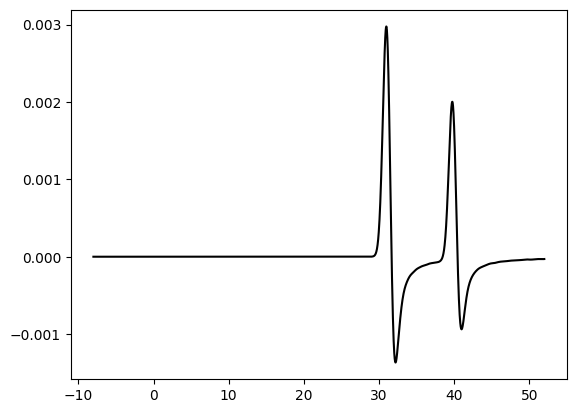

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import glob

cmap = plt.get_cmap('bone')
offset = 1000

# gets seismograms
files = glob.glob('OUTPUT_FILES/*.BXY.semd')

for i,file in enumerate(sorted(files,key=lambda x: int(os.path.basename(x).split('.')[1][1:]),reverse=True)):
    irev = len(files)-i-1
    print("trace: ",irev,file)
    trace = np.loadtxt(file)
    plt.plot(trace[:,0],trace[:,1]+irev*offset,color=cmap(irev/len(files)))

# saves as JPEG file
plt.savefig("OUTPUT_FILES/tmp_traces.jpg")

plt.show()

#from IPython.display import Image, display
#display(Image('OUTPUT_FILES/tmp_traces.jpg',width=400))


display a figure:

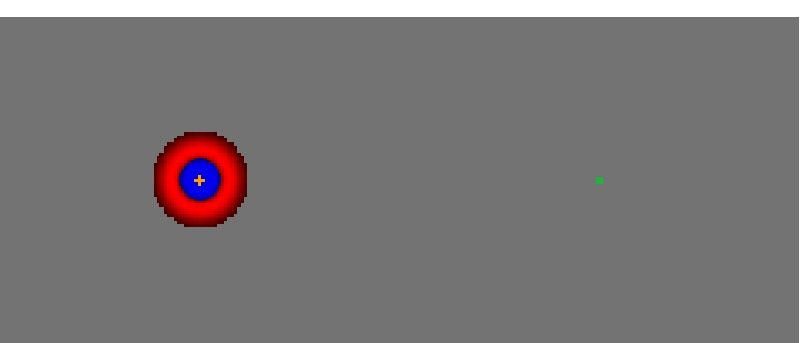

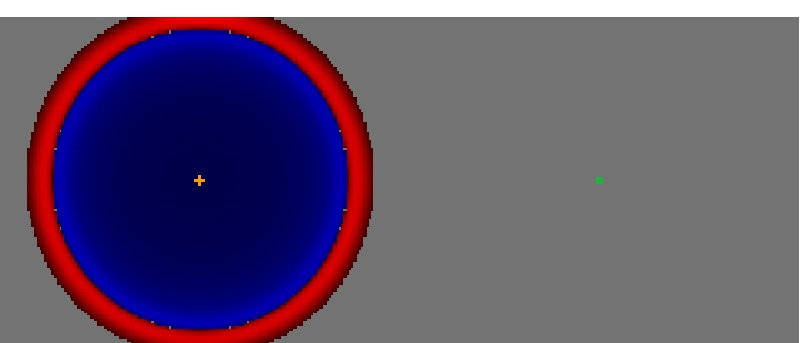

In [28]:
from IPython.display import Image, display
display(Image('OUTPUT_FILES/forward_image000000500.jpg',width=400))
display(Image('OUTPUT_FILES/forward_image000001000.jpg',width=400))

In [29]:
from IPython.display import Image, display
import ipywidgets as widgets
img1 = Image('OUTPUT_FILES/forward_image000000500.jpg')
img2 = Image('OUTPUT_FILES/forward_image000001000.jpg')
img3 = Image('OUTPUT_FILES/forward_image000001500.jpg')
w1 = widgets.Image(value=img1.data,width=300)
w2 = widgets.Image(value=img2.data,width=300)
w3 = widgets.Image(value=img3.data,width=300)

display(widgets.HBox([w1,w2,w3]))

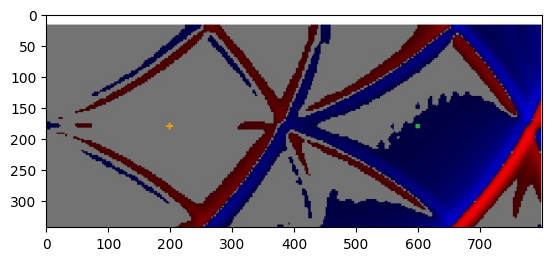

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

img = plt.imread('OUTPUT_FILES/forward_image000003000.jpg')
plt.imshow(img)

all done.